In [1]:
import pandas as pd

# Reading the CSV files and Creating a DataFrame

In [2]:
positions = pd.read_csv("/content/positions.csv")
positions.head()

,date_number,product_id,category_id,position
0,0,4450020,4461548,17
1,0,42147334,4461548,4
2,0,81131830,4461548,35
3,0,84035833,4461548,38
4,0,125252584,4461548,39


In [3]:
products = pd.read_csv("/content/products.csv")
products.head()

,product_id,family_id,subfamily_id,price
0,151926,396066037,335531561,25.95
1,213413,552529755,11509337,19.95
2,310130,679611953,533441312,12.95
3,373883,775013441,62518413,17.95
4,455200,998145072,490222156,29.95


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15238 entries, 0 to 15237
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    15238 non-null  int64  
 1   family_id     15238 non-null  int64  
 2   subfamily_id  15238 non-null  int64  
 3   price         15238 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 476.3 KB


In [5]:
sales = pd.read_csv("/content/sales_stock.csv")
sales.head()

,date_number,product_id,color_id,size_id,sales,stock
0,0,310130,78467031,7026791,1,93
1,0,310130,78467031,8015276,2,62
2,0,310130,78467031,452052101,1,18
3,0,310130,78467031,541898038,2,42
4,0,310130,78467031,558685710,3,113


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736218 entries, 0 to 3736217
Data columns (total 6 columns):
 #   Column       Dtype
---  ------       -----
 0   date_number  int64
 1   product_id   int64
 2   color_id     int64
 3   size_id      int64
 4   sales        int64
 5   stock        int64
dtypes: int64(6)
memory usage: 171.0 MB


In [8]:
all_data = products.merge(sales, how='outer', on='product_id')
all_data.head()

,product_id,family_id,subfamily_id,price,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,59.0,909958217.0,111455099.0,0.0,17.0
1,151926,396066037,335531561,25.95,59.0,909958217.0,242364222.0,3.0,63.0
2,151926,396066037,335531561,25.95,59.0,909958217.0,513017386.0,1.0,33.0
3,151926,396066037,335531561,25.95,59.0,909958217.0,820445075.0,1.0,42.0
4,151926,396066037,335531561,25.95,60.0,909958217.0,54666687.0,2.0,72.0


In [9]:
clean_data = all_data[['product_id','color_id','size_id','price','sales','stock']]
clean_data.head()

,product_id,color_id,size_id,price,sales,stock
0,151926,909958217.0,111455099.0,25.95,0.0,17.0
1,151926,909958217.0,242364222.0,25.95,3.0,63.0
2,151926,909958217.0,513017386.0,25.95,1.0,33.0
3,151926,909958217.0,820445075.0,25.95,1.0,42.0
4,151926,909958217.0,54666687.0,25.95,2.0,72.0


# Focusing on Different Products disregarding the Color and Size

In [10]:
data_by_product_id = sales[['product_id','sales','stock']].groupby(by='product_id').sum()
data_by_product_id.head()

,sales,stock
product_id,,
151926,167,7995
213413,757,56646
310130,578,49639
455200,24,2258
571044,591,18868


In [11]:
products['product_id'].nunique()

15238

In [12]:
data_by_product_id = data_by_product_id.merge(products[['product_id','price']], on='product_id')
data_by_product_id.head()

,product_id,sales,stock,price
0,151926,167,7995,25.95
1,213413,757,56646,19.95
2,310130,578,49639,12.95
3,455200,24,2258,29.95
4,571044,591,18868,15.95


In [13]:
data_by_product_id['sales%'] = data_by_product_id['sales']/(data_by_product_id['stock'])*100
data_by_product_id.head()

,product_id,sales,stock,price,sales%
0,151926,167,7995,25.95,2.088806
1,213413,757,56646,19.95,1.336370
2,310130,578,49639,12.95,1.164407
3,455200,24,2258,29.95,1.062888
4,571044,591,18868,15.95,3.132287


In [14]:
data_by_product_id.reset_index(inplace=True)

<Axes: xlabel='index'>

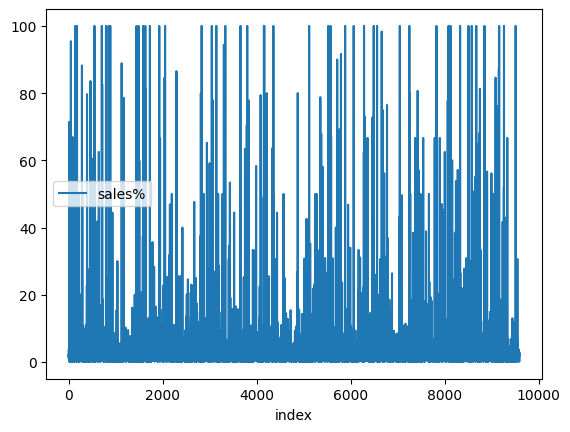

In [15]:
data_by_product_id.plot('index','sales%',kind='line')

In [16]:
best_sellers = data_by_product_id.loc[data_by_product_id['sales%']>=50.00,:]
best_sellers.head()

,index,product_id,sales,stock,price,sales%
12,12,1042445,5,7,49.99,71.428571
48,48,5551656,42,44,17.95,95.454545
70,70,7944101,13,23,22.95,56.521739
84,84,9593020,162,242,15.99,66.942149
140,140,15254736,1,1,29.95,100.000000


In [17]:
top_sellers = data_by_product_id.loc[data_by_product_id['sales%']>=85.00,:]
top_sellers.head()

,index,product_id,sales,stock,price,sales%
48,48,5551656,42,44,17.95,95.454545
140,140,15254736,1,1,29.95,100.000000
178,178,18904572,16,16,15.99,100.000000
283,283,30446049,15,17,25.95,88.235294
550,550,57726281,9,9,59.95,100.000000


# Plotting the number of Sales over Time

In [18]:
dates_df = pd.DataFrame(sales['date_number'].value_counts())
dates_df.reset_index(inplace=True)

In [19]:
dates_df.head()

,index,date_number
0,78,48326
1,73,48306
2,79,48251
3,74,48160
4,77,48025


In [20]:
dates_df.sort_values(by='index', inplace=True)

In [21]:
dates_df.head()

,index,date_number
91,0,28105
89,1,28810
90,2,28723
88,3,29377
86,4,29764


In [22]:
dates_df.rename(columns={'index':'day','date_number':'sales'},inplace=True)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

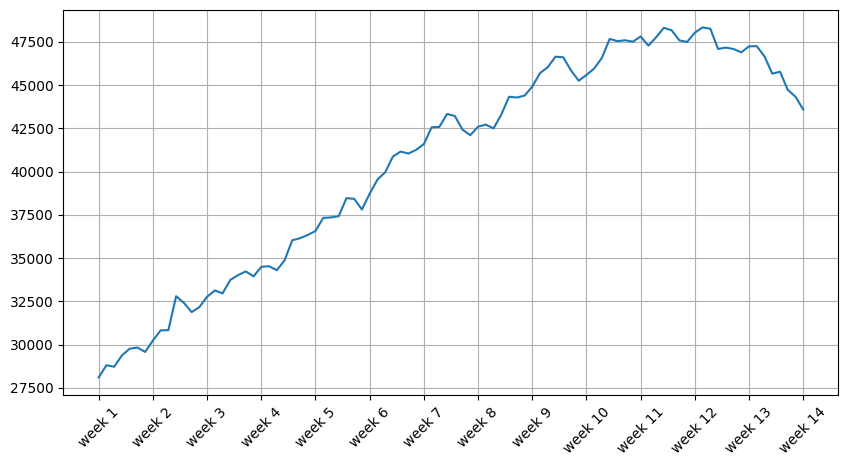

In [24]:
plt.figure(figsize=(10, 5)) 
plt.plot(dates_df['day'],dates_df['sales'])
weekly_ticks = np.arange(0,92,7)
weekly_labels = []
for i in range(14):
  weekly_labels.append(f'week {i+1}')
plt.xticks(ticks=weekly_ticks,labels=weekly_labels,rotation=45)
plt.grid()

# Trying to find trends between price and percentage of sales

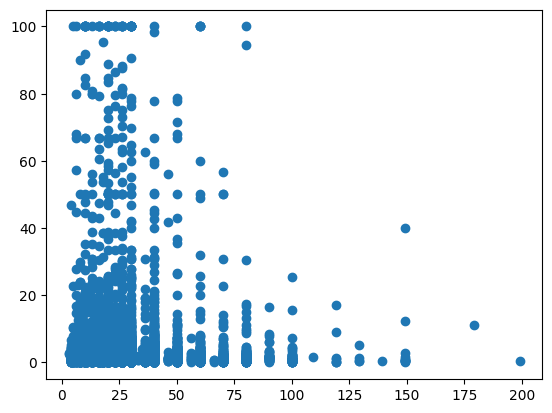

In [25]:
plt.scatter(data_by_product_id['price'],data_by_product_id['sales%'])

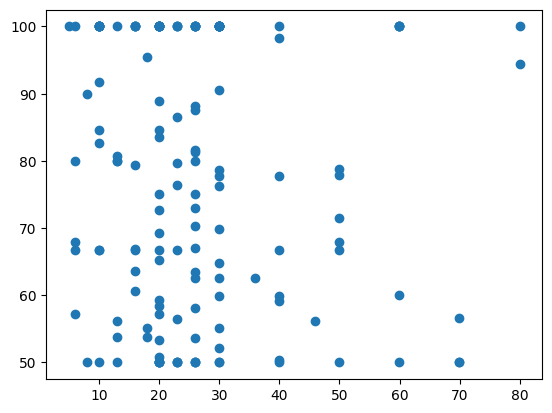

In [26]:
plt.scatter(best_sellers['price'],best_sellers['sales%'])

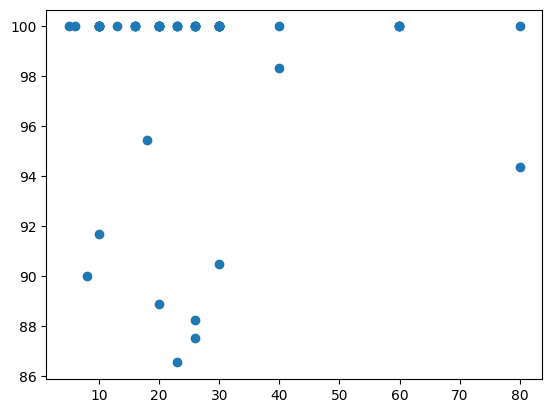

In [27]:
plt.scatter(top_sellers['price'], top_sellers['sales%'])

# Checking the impact of Different Colors on Sales

In [28]:
data_by_color_id = sales[['color_id','sales','stock']].groupby(by='color_id').sum()
data_by_color_id.head()

,sales,stock
color_id,,
2230471,13,30
9348550,206,4013
10926303,12137,830486
11897479,211,3414
17191690,79,2157


In [29]:
data_by_color_id['sales%'] = data_by_color_id['sales']/(data_by_color_id['stock'])*100
data_by_color_id.head()

,sales,stock,sales%
color_id,,,
2230471,13,30,43.333333
9348550,206,4013,5.133317
10926303,12137,830486,1.461433
11897479,211,3414,6.180434
17191690,79,2157,3.662494


In [30]:
data_by_color_id.reset_index(inplace=True)

In [31]:
data_by_color_id.head()

,color_id,sales,stock,sales%
0,2230471,13,30,43.333333
1,9348550,206,4013,5.133317
2,10926303,12137,830486,1.461433
3,11897479,211,3414,6.180434
4,17191690,79,2157,3.662494


In [32]:
clean_data['sales%'] = clean_data['sales']/(clean_data['stock'])*100
clean_data.head()

<ipython-input-32-5751a5a8c279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['sales%'] = clean_data['sales']/(clean_data['stock'])*100


,product_id,color_id,size_id,price,sales,stock,sales%
0,151926,909958217.0,111455099.0,25.95,0.0,17.0,0.000000
1,151926,909958217.0,242364222.0,25.95,3.0,63.0,4.761905
2,151926,909958217.0,513017386.0,25.95,1.0,33.0,3.030303
3,151926,909958217.0,820445075.0,25.95,1.0,42.0,2.380952
4,151926,909958217.0,54666687.0,25.95,2.0,72.0,2.777778


In [33]:
product_id_list = clean_data['product_id'].unique()

In [34]:
best_color_list = []
for id in product_id_list:
  products = clean_data.loc[clean_data['product_id']==id,:]
  best_products = products.loc[products['sales%']==max(products['sales%']),:]
  best_colors = {'color_id': best_products['color_id'],'size_id': best_products['size_id'],'price': best_products['price'],'sales': best_products['sales'],'stock': best_products['stock'],'sales%': best_products['sales%']}
  best_color_list.append(best_colors)

In [35]:
best_color_size = pd.DataFrame(columns = ["product_id", "color_id", "size_id","price","sales","stock","sales%"])
for id in product_id_list:
  df = clean_data.loc[clean_data['product_id']==id,:]
  best_color_size = pd.concat([best_color_size, df[df['sales%'] == max(df['sales%'])]])

In [36]:
best_color_size.drop_duplicates(subset=['product_id','size_id','color_id'],keep='first',inplace=True)

#This dataframe has the best seller color and size combination for each unique product_id.

In [37]:
best_color_size.head()

,product_id,color_id,size_id,price,sales,stock,sales%
100,151926,909958217.0,111455099.0,25.95,3.0,6.0,50.000000
214,213413,271590995.0,422108434.0,19.95,2.0,15.0,13.333333
1160,310130,78467031.0,541898038.0,12.95,2.0,9.0,22.222222
1402,455200,649181039.0,111455099.0,29.95,3.0,9.0,33.333333
1642,571044,735224030.0,111455099.0,15.95,2.0,2.0,100.000000


In [38]:
color_size_best_sellers = best_color_size.loc[best_color_size['sales%']>=85,:]
color_size_best_sellers.head()

,product_id,color_id,size_id,price,sales,stock,sales%
1642,571044,735224030.0,111455099.0,15.95,2.0,2.0,100.0
1882,571044,735224030.0,513017386.0,15.95,1.0,1.0,100.0
1978,571044,665237982.0,242364222.0,15.95,3.0,3.0,100.0
1998,571044,735224030.0,242364222.0,15.95,4.0,4.0,100.0
1999,571044,735224030.0,820445075.0,15.95,2.0,2.0,100.0


In [39]:
color_size_best_sellers['stock'].value_counts()

1.0      11152
2.0       3652
3.0       1623
4.0        953
5.0        588
         ...  
72.0         1
84.0         1
124.0        1
87.0         1
73.0         1
Name: stock, Length: 84, dtype: int64

In [40]:
best_sellers_clean = color_size_best_sellers.loc[color_size_best_sellers['stock']>50,:]
best_sellers_clean.head()

,product_id,color_id,size_id,price,sales,stock,sales%
174442,47649748,744479403.0,242364222.0,19.95,87.0,87.0,100.0
174447,47649748,744479403.0,820445075.0,19.95,124.0,124.0,100.0
260999,73474899,149270693.0,820445075.0,12.95,61.0,61.0,100.0
261001,73474899,477858656.0,820445075.0,12.95,58.0,58.0,100.0
313585,85512207,429279321.0,7026791.0,5.95,57.0,57.0,100.0


In [41]:
best_sellers_clean['product_id'].value_counts()

309984210    3
841624427    3
638342517    3
173860885    3
400308675    3
47649748     2
744651212    2
555278269    2
73474899     2
486354287    2
203958447    2
175862536    2
245197898    1
159381458    1
978117283    1
921521142    1
85512207     1
837438273    1
776356585    1
109316063    1
743085239    1
738782203    1
704205080    1
658235806    1
590634596    1
247063103    1
556775487    1
169063936    1
547283192    1
519521021    1
427522176    1
412199603    1
385282210    1
231862828    1
259016931    1
979799762    1
Name: product_id, dtype: int64

In [42]:
best_sellers_clean['color_id'].value_counts()

735224030.0    11
744479403.0     7
444220004.0     4
665237982.0     4
654679495.0     3
819595309.0     2
617064550.0     2
32598062.0      2
473173976.0     2
78467031.0      2
429279321.0     2
38379663.0      1
51733619.0      1
149270693.0     1
718368786.0     1
544880853.0     1
431126416.0     1
859479207.0     1
477858656.0     1
131040921.0     1
970404272.0     1
280124428.0     1
491503397.0     1
Name: color_id, dtype: int64

In [43]:
best_sellers_clean['size_id'].value_counts()

820445075.0    24
242364222.0    18
558685710.0     4
7026791.0       1
941322277.0     1
843639151.0     1
54666687.0      1
674701524.0     1
8015276.0       1
513017386.0     1
Name: size_id, dtype: int64

In [44]:
best_sellers_clean['price'].value_counts()

12.95    12
25.95    12
19.95     7
15.95     5
29.95     4
22.95     3
17.95     3
49.95     2
5.95      1
39.95     1
3.95      1
9.95      1
7.95      1
Name: price, dtype: int64

<ipython-input-45-9f9b48a5a288>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(best_color_size.corr(), annot=True)


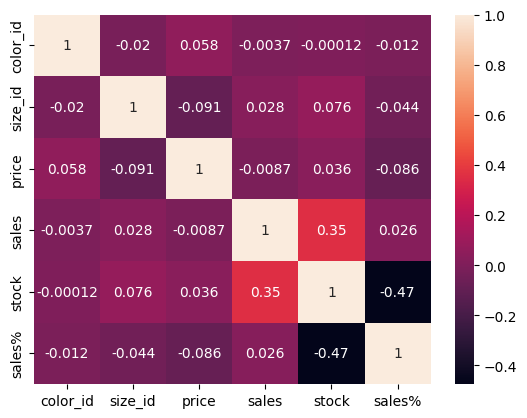

In [45]:
import seaborn as sns
ax = sns.heatmap(best_color_size.corr(), annot=True)

# Considering only one day to analyze Different Products

In [46]:
day_one = all_data.loc[all_data['date_number']==0,:]
day_one.head()

,product_id,family_id,subfamily_id,price,date_number,color_id,size_id,sales,stock
786,310130,679611953,533441312,12.95,0.0,78467031.0,7026791.0,1.0,93.0
787,310130,679611953,533441312,12.95,0.0,78467031.0,8015276.0,2.0,62.0
788,310130,679611953,533441312,12.95,0.0,78467031.0,452052101.0,1.0,18.0
789,310130,679611953,533441312,12.95,0.0,78467031.0,541898038.0,2.0,42.0
790,310130,679611953,533441312,12.95,0.0,78467031.0,558685710.0,3.0,113.0


In [47]:
day_one['product_id'].value_counts()

848832888    57
229677225    56
740562589    56
377100361    45
472667200    42
             ..
812194994     1
40895502      1
638566358     1
464365087     1
801141226     1
Name: product_id, Length: 4699, dtype: int64

In [48]:
day_one_product = day_one[['product_id','sales','stock']].groupby(by='product_id').sum()
day_one_product['sales%'] = day_one_product['sales']/(day_one_product['stock'])*100
day_one_product.reset_index(inplace=True)
day_one_product.head()

,product_id,sales,stock,sales%
0,310130,11.0,461.0,2.386117
1,1178388,0.0,60.0,0.000000
2,1561460,7.0,791.0,0.884956
3,1874414,4.0,281.0,1.423488
4,2436420,0.0,245.0,0.000000


In [49]:
sum(day_one_product['sales%'])

18127.0576103919

In [50]:
day_one_product_best = day_one_product.loc[day_one_product['stock']>300,:]
day_one_product_best.head()

,product_id,sales,stock,sales%
0,310130,11.0,461.0,2.386117
2,1561460,7.0,791.0,0.884956
6,2644529,6.0,444.0,1.351351
8,3129413,37.0,542.0,6.826568
9,3176725,9.0,362.0,2.486188


In [52]:
all_data_by_price = all_data[['price','sales','stock']].groupby(by='price').sum()
all_data_by_price.reset_index(inplace=True)
all_data_by_price.head()

,price,sales,stock
0,0.33,0.0,0.0
1,1.00,0.0,0.0
2,2.95,916.0,36361.0
3,3.95,109999.0,6665014.0
4,3.99,693.0,17512.0


In [53]:
all_data_by_price.drop(all_data_by_price[all_data_by_price['stock'] == 0].index, inplace=True)
all_data_by_price.reset_index(inplace=True)

([<matplotlib.patches.Wedge at 0x7fe255196070>,
 [Text(1.0999998324556344, 0.0006071223736894276, '2.95'),
  Text(1.0942521213882623, 0.11230447380798098, '3.95'),
  Text(1.0772554246366834, 0.22253258208819449, '3.99'),
  Text(1.0578178912407625, 0.3016973797880029, '4.95'),
  Text(0.9787280951034593, 0.502086960451229, '5.95'),
  Text(0.9093300910974279, 0.6189659000500299, '5.99'),
  Text(0.8986298164868384, 0.6344008613809027, '6.95'),
  Text(0.8876557634408824, 0.6496670267376854, '6.99'),
  Text(0.886618655789166, 0.6510816839741482, '7.47'),
  Text(0.7454269939632754, 0.8089119832657168, '7.95'),
  Text(0.5760091230720642, 0.9371304552396916, '7.97'),
  Text(0.5739754369263455, 0.938377428226623, '7.99'),
  Text(0.5464047214721686, 0.954694652940364, '8.95'),
  Text(0.519246989821475, 0.9697332435063456, '8.97'),
  Text(0.2712409680244964, 1.0660339287588994, '9.95'),
  Text(-0.004032343622901625, 1.0999926091592194, '9.97'),
  Text(-0.023569049934773614, 1.0997474709610258, '9.

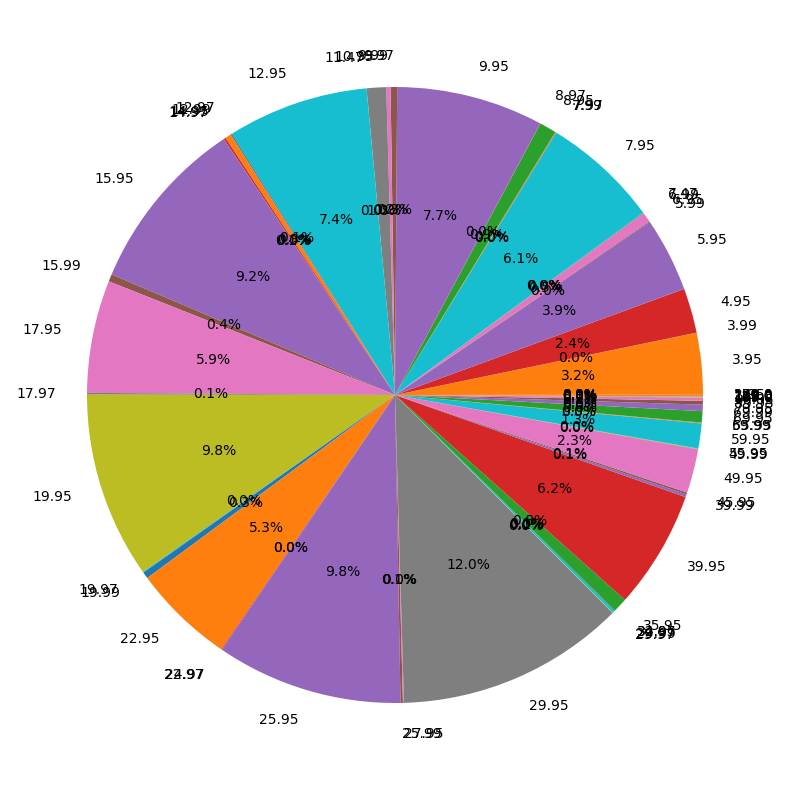

In [54]:
plt.figure(figsize=(10,10))
plt.pie(all_data_by_price['stock'], labels=all_data_by_price['price'], autopct='%1.1f%%')

In [55]:
all_data_by_price['stock'].sum()

206967476.0

In [56]:
application_types_to_replace = []
for v in range(len(all_data_by_price['stock'])):
  if (all_data_by_price['stock'][v] < 4760252) :
    application_types_to_replace.append(all_data_by_price['index'][v])

# Replace in dataframe
for app in application_types_to_replace:
    all_data_by_price['stock'] = all_data_by_price['stock'].replace(app,"Other")

# Check to make sure binning was successful
all_data_by_price['stock'].value_counts()

36361.0       1
6665014.0     1
20256801.0    1
258314.0      1
103467.0      1
             ..
12220726.0    1
192608.0      1
20201275.0    1
81065.0       1
11052.0       1
Name: stock, Length: 64, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe2537703a0>,
 [Text(1.0999998324556344, 0.0006071223736894276, '2.95'),
  Text(1.0942521213882623, 0.11230447380798098, '3.95'),
  Text(1.0772554246366834, 0.22253258208819449, '3.99'),
  Text(1.0578178912407625, 0.3016973797880029, '4.95'),
  Text(0.9787280951034593, 0.502086960451229, '5.95'),
  Text(0.9093300910974279, 0.6189659000500299, '5.99'),
  Text(0.8986298164868384, 0.6344008613809027, '6.95'),
  Text(0.8876557634408824, 0.6496670267376854, '6.99'),
  Text(0.886618655789166, 0.6510816839741482, '7.47'),
  Text(0.7454269939632754, 0.8089119832657168, '7.95'),
  Text(0.5760091230720642, 0.9371304552396916, '7.97'),
  Text(0.5739754369263455, 0.938377428226623, '7.99'),
  Text(0.5464047214721686, 0.954694652940364, '8.95'),
  Text(0.519246989821475, 0.9697332435063456, '8.97'),
  Text(0.2712409680244964, 1.0660339287588994, '9.95'),
  Text(-0.004032343622901625, 1.0999926091592194, '9.97'),
  Text(-0.023569049934773614, 1.0997474709610258, '9.

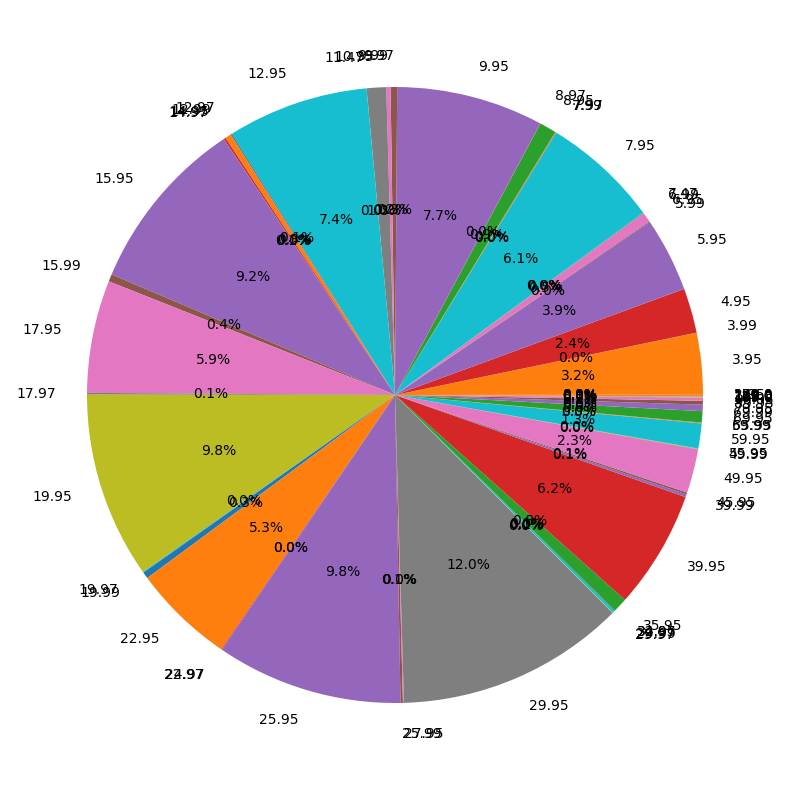

In [57]:
plt.figure(figsize=(10,10))
plt.pie(all_data_by_price['stock'], labels=all_data_by_price['price'], autopct='%1.1f%%')

In [58]:
all_data_by_price.head()

,index,price,sales,stock
0,2,2.95,916.0,36361.0
1,3,3.95,109999.0,6665014.0
2,4,3.99,693.0,17512.0
3,5,4.95,85297.0,4865667.0
4,6,5.95,143242.0,8057454.0


In [62]:
day_one_best_sellers = day_one_product_best.loc[day_one_product_best['sales%']>20,:]
day_one_best_sellers.head()

,product_id,sales,stock,sales%
1012,211014577,86.0,350.0,24.571429
1615,333067721,122.0,380.0,32.105263
2016,415998664,83.0,346.0,23.988439


In [61]:
max(day_one_product_best['sales%'])

32.10526315789474

In [67]:
day_best_sellers = pd.DataFrame(columns = ["product_id","sales","stock","sales%"])

for day in range(92):
  day_df = all_data.loc[all_data['date_number']== day,:]
  day_product = day_df[['product_id','sales','stock']].groupby(by='product_id').sum()
  day_product['sales%'] = day_product['sales']/(day_product['stock'])*100
  day_product.reset_index(inplace=True)
  day_product_best = day_product.loc[day_product['stock']>300,:]
  day_best_sellers = pd.concat([day_best_sellers, day_product_best[day_product_best['sales%'] == max(day_product_best['sales%'])]])

In [68]:
day_best_sellers

,product_id,sales,stock,sales%
1615,333067721,122.0,380.0,32.105263
545,110035051,77.0,404.0,19.059406
1646,333067721,94.0,308.0,30.519481
1849,360939652,112.0,434.0,25.806452
3859,780324216,159.0,508.0,31.299213
...,...,...,...,...
1556,182116805,85.0,422.0,20.142180
3661,428374616,285.0,448.0,63.616071
1355,159381458,215.0,681.0,31.571219
3067,357939750,139.0,325.0,42.769231


In [75]:
day_best_sellers_clean = day_best_sellers.groupby(by='product_id').sum()
day_best_sellers_clean

,sales,stock,sales%
product_id,,,
28691464,111.0,348.0,31.896552
42707777,138.0,758.0,36.540559
47649748,84.0,321.0,26.168224
71929500,244.0,825.0,58.651037
110035051,77.0,404.0,19.059406
...,...,...,...
957329299,664.0,1416.0,85.462289
962203220,74.0,322.0,22.981366
970955082,131.0,312.0,41.987179


In [76]:
day_best_sellers_clean.reset_index(inplace=True)

In [77]:
day_best_sellers_clean['sales%'] = day_best_sellers_clean['sales']/(day_best_sellers_clean['stock'])*100

In [83]:
day_best_sellers_clean.sort_values(by='sales%', inplace=True, ascending=False)

In [84]:
day_best_sellers_clean.head(3)

,product_id,sales,stock,sales%
13,173860885,314.0,316.0,99.367089
16,203958447,399.0,406.0,98.275862
39,555278269,990.0,1373.0,72.104880
